<a href="https://colab.research.google.com/github/dpakkaushik/Time-Series-Forecast/blob/main/Univariate_TimeSeries_Forecasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reading Data

In [173]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.max_rows', None)  

In [174]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
path = "/content/drive/MyDrive/Data Sets/Electricity Consumption.csv"

df = pd.read_csv(path)

df.head()



,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


### EDA

In [176]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [177]:
#Renaming Column for easy addressing 

df.rename(columns={"Electricty_Consumption_in_TW": "Electricity_Consumption","DATE": "Date"},inplace=True)

df.info()

#Formatting Date column to Datetime
df['Date'] = pd.to_datetime(df.Date, format='%m/%d/%Y')

#Extracting Year And Month column from Date and adding as new columns
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     561 non-null    object 
 1   Electricity_Consumption  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     561 non-null    datetime64[ns]
 1   Electricity_Consumption  561 non-null    float64       
 2   year                     561 non-null    int64         
 3   month                    561 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 17.7 KB


### Setting Index
#### The data which is indexed by time is called Time Series data, hence need to set Date column as index

In [178]:
df.set_index(df.Date, inplace=True)

#Checking Index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     561 non-null    datetime64[ns]
 1   Electricity_Consumption  561 non-null    float64       
 2   year                     561 non-null    int64         
 3   month                    561 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 21.9 KB


### Checking Missing Values

In [179]:
#Using isna for missing data
print(df.isna().sum())

#Using groupby to check for any missing month
df.groupby(df.Date.map(lambda x : x.year)).count()

Date                       0
Electricity_Consumption    0
year                       0
month                      0
dtype: int64


,Date,Electricity_Consumption,year,month
Date,,,,
1973,12,12,12,12
1974,12,12,12,12
1975,12,12,12,12
1976,12,12,12,12
1977,12,12,12,12
1978,12,12,12,12
1979,12,12,12,12
1980,12,12,12,12
1981,12,12,12,12


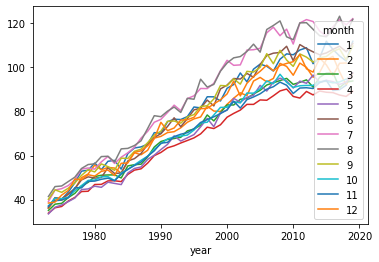

In [180]:
#Plotting year trend
pd.pivot_table(data = df, index = 'year', columns = 'month', values = 'Electricity_Consumption').plot()

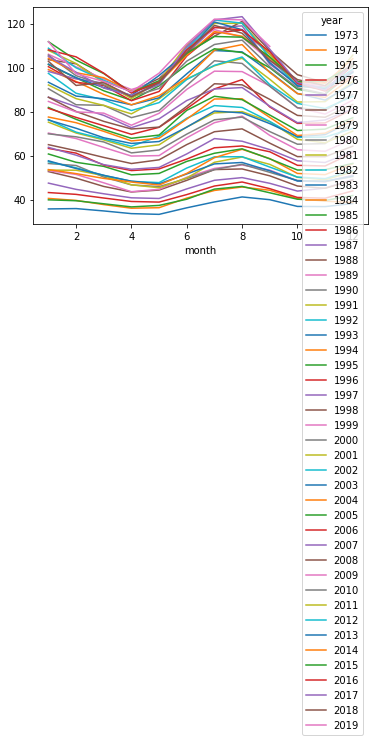

In [181]:
#Plotting Monthy Trend
pd.pivot_table(data = df, index = 'month', columns = 'year', values = 'Electricity_Consumption').plot()

### Decompose Trend 

In [182]:
from statsmodels.tsa.seasonal import seasonal_decompose

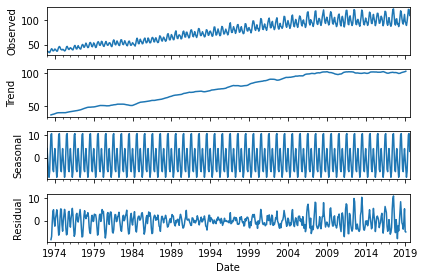

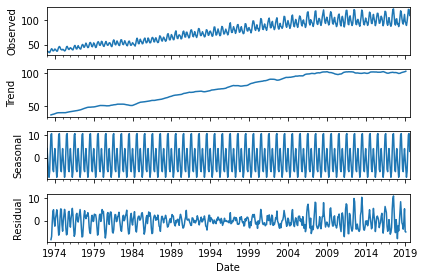

In [183]:
#decom = seasonal_decompose(ts, model='multiplicative')

TS = df.Electricity_Consumption 
decom1 = seasonal_decompose(TS, model='additive')

#Plotting decomposed graph

decom1.plot()

In [184]:
pd.concat([decom1.observed, decom1.trend, decom1.seasonal, decom1.resid], axis=1).head(12)

,Electricity_Consumption,Electricity_Consumption,Electricity_Consumption,Electricity_Consumption
Date,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


### decompose using stldecompose

In [185]:
#Installing stlddecompose package
!pip install stldecompose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [186]:
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

In [187]:
#Test Train split
train = df.Electricity_Consumption[:"2019-01-01"]
train
test = df.Electricity_Consumption["2019-01-01":]
test

Date
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricity_Consumption, dtype: float64

In [188]:
stl_decom = decompose(train, period=12)

In [189]:
stl_decom_values = pd.concat([stl_decom.observed, stl_decom.trend, stl_decom.seasonal, stl_decom.resid], axis=1).head(12)
stl_decom_values.columns = ["Actual","Trend","Seasonal","Irregular"]
stl_decom_values
#BY default stl uses additive decomposition in additive decomposition we get few nwgative seasonal values

,Actual,Trend,Seasonal,Irregular
Date,,,,
1973-01-01,35.9728,37.294296,3.965734,-5.287230
1973-02-01,36.1334,37.435143,-0.586103,-0.715639
1973-03-01,35.0625,37.575989,-4.303356,1.789867
1973-04-01,33.8416,37.716836,-8.537739,4.662503
1973-05-01,33.5107,37.857682,-5.998124,1.651141
1973-06-01,36.4823,37.998529,2.844830,-4.361059
1973-07-01,39.1412,38.139428,10.259793,-9.258021
1973-08-01,41.4137,38.280327,10.813475,-7.680102
1973-09-01,40.1639,38.421226,2.864743,-1.122069


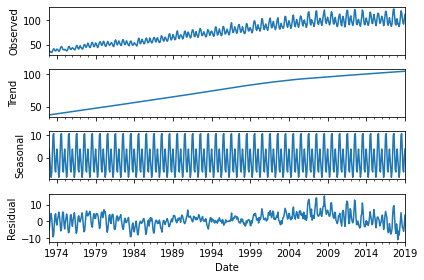

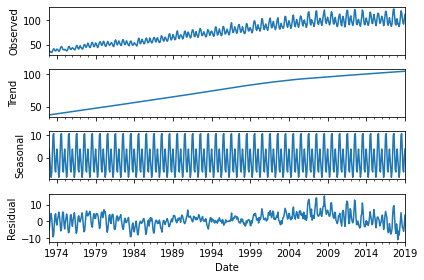

In [190]:

stl_decom.plot()

In [192]:
f_cast = forecast(stl_decom,steps=24,fc_func= drift, seasonal= True)
f_cast

,drift+seasonal
2019-02-01,103.715023
2019-03-04,100.064428
2019-04-04,95.896713
2019-05-05,98.502991
2019-06-05,107.412610
2019-07-06,114.894237
2019-08-06,115.514584
2019-09-06,107.632516
2019-10-07,99.683708
2019-11-07,98.672351


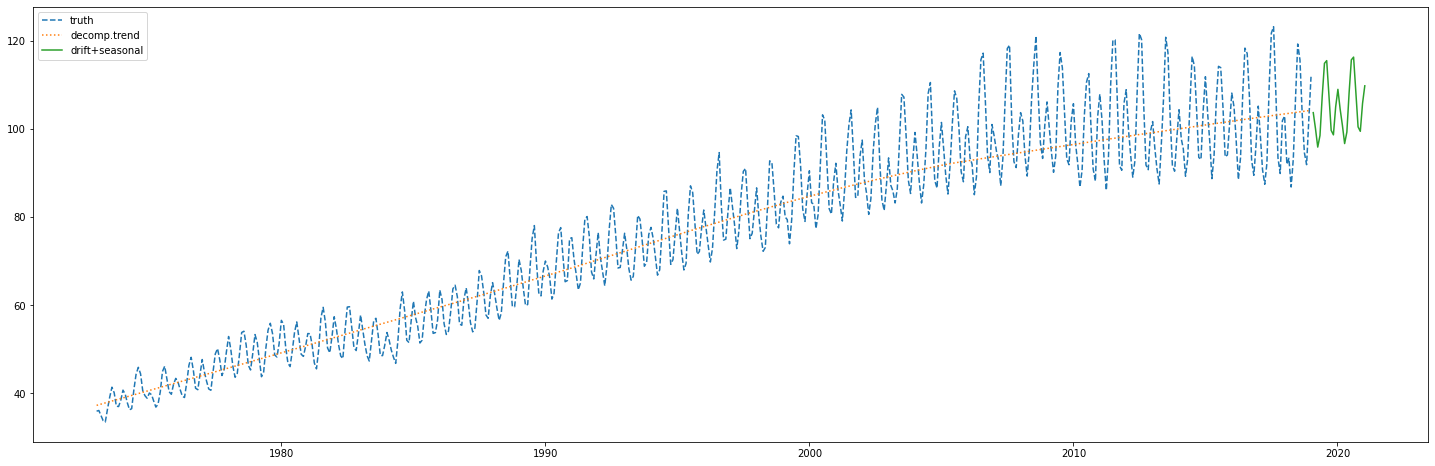

In [193]:
plt.figure(figsize=(25,8))

plt.plot(train,'--', label = 'truth')
plt.plot(stl_decom.trend, ':', label = 'decomp.trend')
plt.plot(f_cast,"-",label = f_cast.columns[0])

plt.legend()

In [194]:
from scipy.signal.ltisys import step
stl_decomp1 = decompose(train, period=24) #additive decomposing
f_cast_9m = forecast(stl_decomp1 ,steps = 9 ,fc_func= drift, seasonal= True)

In [195]:
f_cast_9m

,drift+seasonal
2019-02-01,103.679692
2019-03-04,100.114099
2019-04-04,95.790391
2019-05-05,98.145577
2019-06-05,107.136390
2019-07-06,114.995239
2019-08-06,115.949707
2019-09-06,107.663860
2019-10-07,99.654921


In [230]:
#Calculating MAPE
MAE_Decomposition = np.mean(abs(f_cast_9m['drift+seasonal']-test))
MAE_Decomposition 


6.3535915909756255

### ETS Model
##### The ETS models are a family of time series models with an underlying state space model consisting of a level component, a trend component (T), a seasonal component (S), and an error term (E).

In [197]:
#ETS model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [198]:
## UDF for ETF testing
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model = model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.fittedvalues
                    score = (mean_absolute_error(actual, f_cast))  

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [199]:
# Univariate timeseries
ts = df.Electricity_Consumption


In [200]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

In [201]:
auto_hwm(ts, val_split_date ='1973-01-01' , alpha=alpha, beta=beta, gamma=gamma, trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 512 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}
Checking for

{'alpha': 0.6, 'beta': 0.1, 'gamma': 0.2, 'mae': 1.4570263724028722}

### Checking Model Accuracy 
###### with best alfa :06 , beta: 0.1 , gama:0.2  values

In [202]:
ets_model1 = ExponentialSmoothing(train , trend='mul', seasonal='mul', seasonal_periods=13).fit(smoothing_level=0.6, smoothing_slope=0.1, smoothing_seasonal=0.2)

In [203]:
print(ets_model1.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  553
Model:             ExponentialSmoothing   SSE                          28199.957
Optimized:                         True   AIC                           2208.240
Trend:                   Multiplicative   BIC                           2281.601
Seasonal:                Multiplicative   AICC                          2209.666
Seasonal Periods:                    13   Date:                 Tue, 12 Jul 2022
Box-Cox:                          False   Time:                         08:06:57
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6000000                alpha                False
smoothing_slope          

In [204]:
#Backward testing using ETS
fcast1 = ets_model1.forecast(9)
fcast1

2019-02-01    108.874548
2019-03-01    108.783324
2019-04-01    110.403307
2019-05-01    108.553028
2019-06-01    110.932671
2019-07-01    114.881488
2019-08-01    119.795947
2019-09-01    120.055109
2019-10-01    118.280189
Freq: MS, dtype: float64

In [231]:
# Error Measurement

MAE_ETS  = mean_absolute_error(test,fcast1)
MAE_ETS

8.924589345334812

In [206]:
### Forecast
ETS_Forecast = ets_model1.forecast(33)
ETS_Forecast["2019-10-01": ]

2019-10-01    118.280189
2019-11-01    115.523517
2019-12-01    114.299114
2020-01-01    117.787642
2020-02-01    120.075070
2020-03-01    121.356882
2020-04-01    121.255199
2020-05-01    123.060912
2020-06-01    120.998500
2020-07-01    123.650966
2020-08-01    128.052510
2020-09-01    133.530406
2020-10-01    133.819280
2020-11-01    131.840869
2020-12-01    128.768148
2021-01-01    127.403368
2021-02-01    131.291851
2021-03-01    133.841530
2021-04-01    135.270300
2021-05-01    135.156960
2021-06-01    137.169695
2021-07-01    134.870831
2021-08-01    137.827398
2021-09-01    142.733574
2021-10-01    148.839504
Freq: MS, dtype: float64

### ARIMA Model

In [207]:

from statsmodels.tsa.stattools import acf, pacf_ols

In [208]:
#Auto correlation factor
acf(ts) 

array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636,
       0.85166914, 0.77857553, 0.73313065, 0.74640927, 0.79162819,
       0.81316289, 0.78520664, 0.73310236, 0.71201771, 0.74767556,
       0.80929857, 0.83784094, 0.79920595, 0.72847833, 0.6849164 ,
       0.69784608])

In [209]:
#Partial Autocorrelation factor
pacf_ols(ts)

array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ,
       -0.12035626, -0.01871735, -0.05644169, -0.00463219, -0.06631367,
        0.0409564 ,  0.02993122, -0.04493081,  0.10883131,  0.00458799,
        0.13946451,  0.10968151, -0.18123046, -0.01554567, -0.0029174 ,
       -0.07123474])

In [210]:
import statsmodels.tsa.api as smt

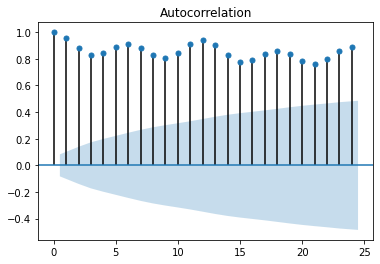

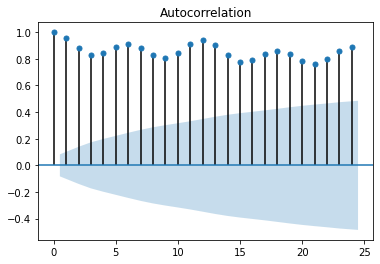

In [211]:
#Plotting ACF to check
# 1 Timeseries stationary or not
# 2 ARIMA model possible or not
# 3 Having pattern hence data has seasonality
# Note- If Auto correlation value not coming close to zero or crossing zero means it is a non stationary series
smt.graphics.plot_acf(ts, lags=24)

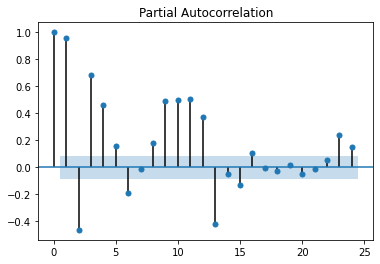

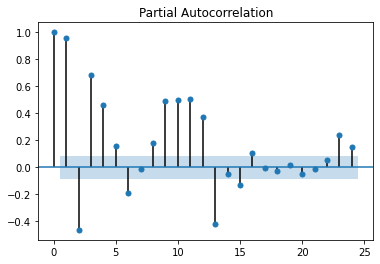

In [212]:
# Plotting PACF
smt.graphics.plot_pacf(ts, lags = 24, method='ols')


In [213]:
#the series is not stationary
# To make it a stationary series we can use following methods
# Take log transformation
# detrend the series
# deseasonalise the series
# take differencing
# or use combination of that
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(ts)   #p-value: 0.0.4103281604468735   , since p-value is high, the series(ts) is not stationary

(-1.7405933729832335,
 0.4103281604468735,
 15,
 545,
 {'1%': -3.442405720052601,
  '10%': -2.5696022094099824,
  '5%': -2.866857804790472},
 2295.409663118043)

In [214]:
#Taking log of value
ts_log = np.log(ts)

In [215]:
# Checking for stationay using ADF test
adfuller(ts_log) 

(-3.0018666788915533,
 0.034720443300657135,
 15,
 545,
 {'1%': -3.442405720052601,
  '10%': -2.5696022094099824,
  '5%': -2.866857804790472},
 -2515.6635118596973)

In [216]:
stationary_series = ts_log
stationary_series

Date
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
                ...   
2019-05-01    4.580734
2019-06-01    4.708250
2019-07-01    4.804852
2019-08-01    4.802187
2019-09-01    4.697923
Name: Electricity_Consumption, Length: 561, dtype: float64

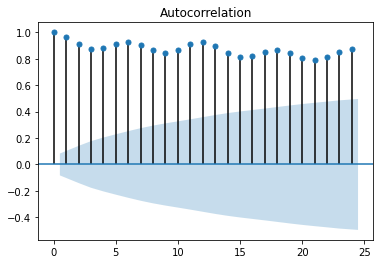

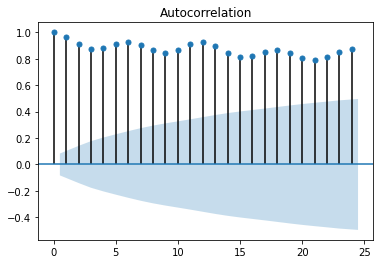

In [217]:
smt.graphics.plot_acf(stationary_series, lags=24)

In [218]:
# Applying differencing to make series stationary
stat_ser = ts.diff().dropna()

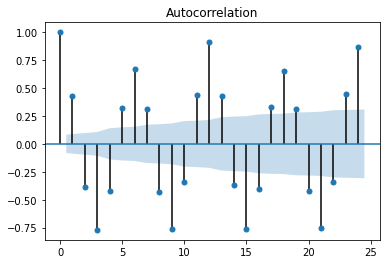

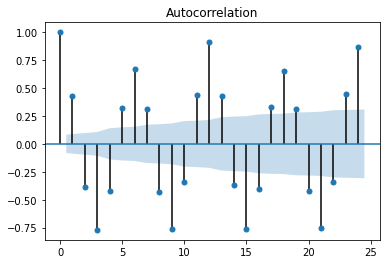

In [219]:
# Plotting ACF plot on differenced time series
smt.graphics.plot_acf(stat_ser, lags=24)
#The plot loooks simillar at places it indicates it data has seasonality and we need to perform sarima model for this
#WE can conclude q values by looking at plot -- after which lag value crossing zero (here it is after lag 1) hence q = 1

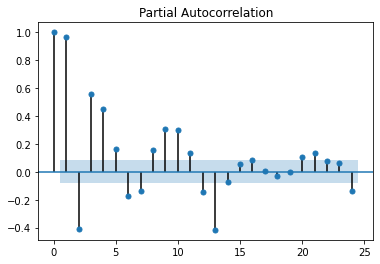

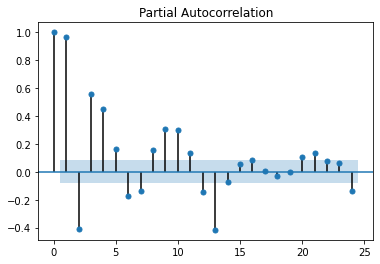

In [220]:
# Plotting PACF plot on differenced time series

smt.graphics.plot_pacf(stationary_series, lags=24)
#WE can conclude p values by looking at plot -- after which lag value crossing zero (here it is after lag 1) hence p = 1

#### SARIMA 

In [221]:
#Now P D T Q for SARIMA
# T - time period after which number is repeating
# P - will be approximatly equal to p
# Q - will be approximatly equal to q
# D = 0 As series is stationary

# Note to find exact values of p,d,q we perform iterations

arima_input = np.log(ts[: "2018-12-01"])

import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(arima_input, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())


                                 Statespace Model Results                                 
Dep. Variable:            Electricity_Consumption   No. Observations:                  552
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1319.062
Date:                            Tue, 12 Jul 2022   AIC                          -2628.124
Time:                                    08:07:06   BIC                          -2606.694
Sample:                                01-01-1973   HQIC                         -2619.741
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6204      0.054     11.405      0.000       0.514       0.727
ma.L1         -0.8928      0.034   

In [222]:
#import sys
import itertools
import warnings

#regressor is for multivariate timeseries
def auto_arima(arima_input, regressors=None, p=range(0, 2), d=range(0, 1), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=arima_input,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [223]:
best_results = auto_arima(arima_input,  p=range(0, 3), d=range(0,1), q=range(0, 3),
                         P=range(0, 3), D=range(0,1), Q=range(0, 3))    #Number of models = 3*1*3*3*2*3 = 162

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3172.6075357902164
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2419.1040025642424
SARIMAX(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1740.2031370706886
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-1993.077524106439
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-2001.998243710128
SARIMAX(0, 0, 0)x(1, 0, 2, 12)12 - AIC:-1988.6484563156155
SARIMAX(0, 0, 0)x(2, 0, 0, 12)12 - AIC:-1995.5685233004351
SARIMAX(0, 0, 0)x(2, 0, 1, 12)12 - AIC:-1994.6831783784464
SARIMAX(0, 0, 0)x(2, 0, 2, 12)12 - AIC:-1987.5529678367486
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2418.215887989409
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1682.158046290001
SARIMAX(0, 0, 1)x(0, 0, 2, 12)12 - AIC:1028.5261952339392
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-2306.6654513395815
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-2330.8928465420936
SARIMAX(0, 0, 1)x(1, 0, 2, 12)12 - AIC:-2291.217990955138
SARIMAX(0, 0, 1)x(2, 0, 0, 12)12 - AIC:-2304.0206599386383
SARIMAX(0, 0, 1)x(2, 0, 1, 12)12 - AIC:-2302.667150674478
SARIMAX(0

In [224]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(arima_input, order = (2,0,0), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [225]:
#Backward testing using SARIMA model
f_cast3 = np.exp(model.forecast(9))
f_cast3 



2019-01-01    103.567503
2019-02-01     92.894266
2019-03-01     94.532192
2019-04-01     88.094787
2019-05-01     94.762352
2019-06-01    109.045745
2019-07-01    121.613112
2019-08-01    118.021831
2019-09-01    105.465327
Freq: MS, dtype: float64

In [232]:
# Error Measurement using backward testing
print('test error', np.mean(np.abs(test - f_cast3)))
MAE_SARIMA = mean_absolute_error(test,f_cast3)

test error 3.0703297143926482


In [227]:
# Forecast 
SARIMA_Forecast = np.exp(model.forecast(33))
SARIMA_Forecast["2019-10-01":]


2019-10-01     96.525733
2019-11-01     93.739643
2019-12-01    104.087526
2020-01-01    105.719739
2020-02-01     94.786877
2020-03-01     96.472173
2020-04-01     89.878454
2020-05-01     96.716219
2020-06-01    111.367400
2020-07-01    124.265720
2020-08-01    120.581476
2020-09-01    107.699135
2020-10-01     98.531591
2020-11-01     95.675490
2020-12-01    106.287610
2021-01-01    107.962196
2021-02-01     96.750043
2021-03-01     98.478211
2021-04-01     91.718226
2021-05-01     98.728643
2021-06-01    113.757010
2021-07-01    126.994825
2021-08-01    123.213000
2021-09-01    109.993543
Freq: MS, dtype: float64

### Comparision

#### Backtest

###### Backtesting is a term used in modeling to refer to testing a predictive model on historical data.

#### Performance matrices
###### Mean Absolute Error was used as performance metrices

In [233]:
print("Mean Abs Error for Decomposition model is: ", MAE_Decomposition)
print("Mean Abs Error for ETS model is: ", MAE_ETS)
print("Mean Abs Error for SARIMA model is: ", MAE_SARIMA)

Mean Abs Error for Decomposition model is:  6.3535915909756255
Mean Abs Error for ETS model is:  8.924589345334812
Mean Abs Error for SARIMA model is:  3.0703297143926482


#### Looking at the performance matrices SARIMA model is a batter approach to solve this problem.